# About Dataset


link https://www.kaggle.com/datasets/fatemehmehrparvar/obesity-levels

Obesity, which causes physical and mental problems, is a global health problem with serious consequences. The prevalence of obesity is increasing steadily, and therefore, new research is needed that examines the influencing factors of obesity and how to predict the occurrence of the condition according to these factors.

## Imports

In [28]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, StackingClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.preprocessing import LabelEncoder
import kagglehub

## Load the Data

In [10]:
# Download latest version
path = kagglehub.dataset_download("fatemehmehrparvar/obesity-levels")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'obesity-levels' dataset.
Path to dataset files: /kaggle/input/obesity-levels


In [11]:
print(os.listdir(path))

['ObesityDataSet_raw_and_data_sinthetic.csv']


In [12]:
df = pd.read_csv(os.path.join(path,'ObesityDataSet_raw_and_data_sinthetic.csv'))

## Explore the Data

In [13]:
df.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [14]:
df.isna().sum().sum()

np.int64(0)

In [15]:
df.duplicated().sum()

np.int64(24)

In [16]:
df.shape

(2111, 17)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   Gender                          2111 non-null   object 
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   CALC                            2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   SCC                             2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  family_history_with_overweight  2111 non-null   object 
 12  FAF                             21

## Visualize the data

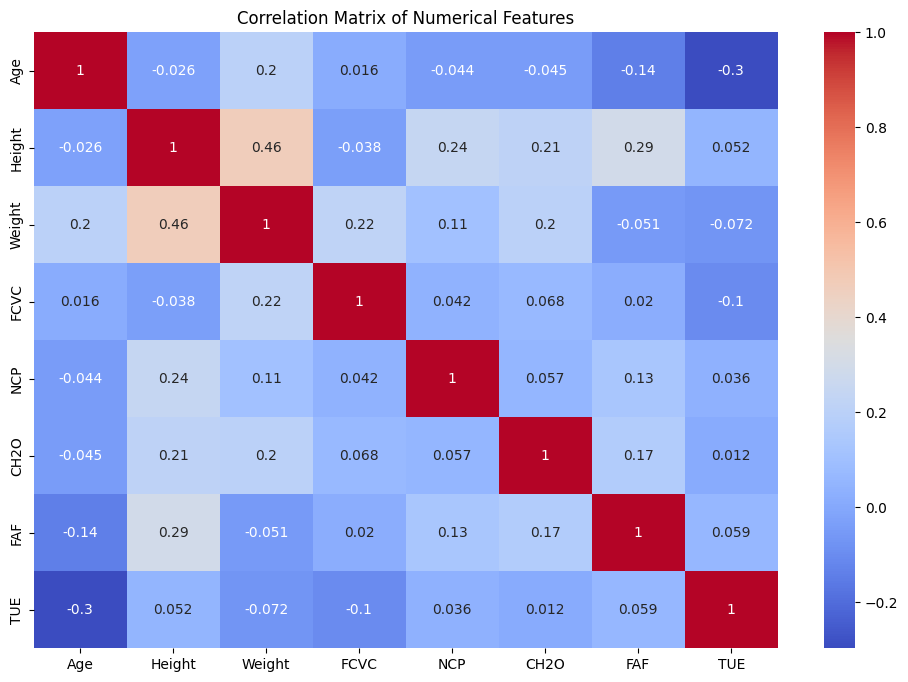

In [18]:
# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include=['float64']).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()


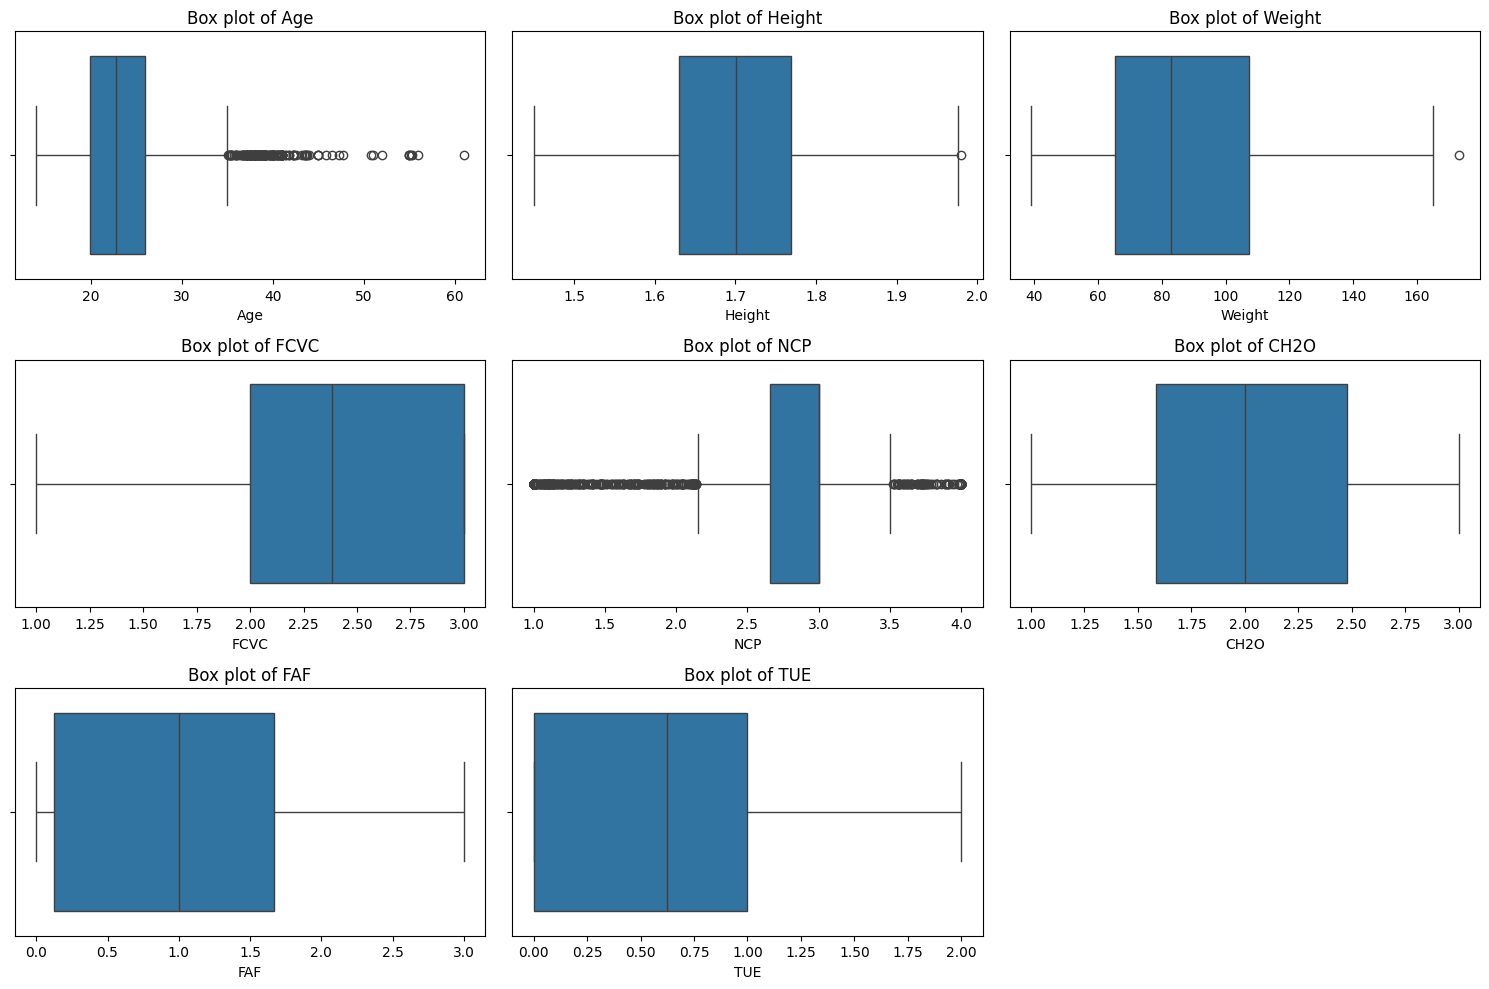

In [19]:
# Box plots for outlier detection (example for Age and Height)
numerical_cols = df.select_dtypes(include=['float64']).columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Box plot of {col}')
plt.tight_layout()
plt.show()

## Preprocessing

In [20]:
df['NObeyesdad'].value_counts()

,count
NObeyesdad,
Obesity_Type_I,351
Obesity_Type_III,324
Obesity_Type_II,297
Overweight_Level_I,290
Overweight_Level_II,290
Normal_Weight,287
Insufficient_Weight,272


In [21]:
df['Gender'] = df['Gender'].replace({'Male': 1, 'Female': 0}).astype(int)
df['FAVC'] = df['FAVC'].replace({'yes': 1, 'no': 0}).astype(int)
df['SCC'] = df['SCC'].replace({'yes': 1, 'no': 0}).astype(int)
df['SMOKE'] = df['SMOKE'].replace({'yes': 1, 'no': 0}).astype(int)
df['family_history_with_overweight'] = df['family_history_with_overweight'].replace({'yes': 1, 'no': 0}).astype(int)

/tmp/ipython-input-330623889.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'] = df['Gender'].replace({'Male': 1, 'Female': 0}).astype(int)
/tmp/ipython-input-330623889.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['FAVC'] = df['FAVC'].replace({'yes': 1, 'no': 0}).astype(int)
/tmp/ipython-input-330623889.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the

In [22]:
cat_cols = ['CALC','CAEC','MTRANS']


for col in cat_cols:
  dummy = pd.get_dummies(df[col]).astype(int)
  df = pd.concat([df,dummy],axis=1)
  df.drop(col, axis=1, inplace=True)

df.head()

,Age,Gender,Height,Weight,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,...,no,Always,Frequently,Sometimes,no,Automobile,Bike,Motorbike,Public_Transportation,Walking
0,21.0,0,1.62,64.0,0,2.0,3.0,0,0,2.0,...,1,0,0,1,0,0,0,0,1,0
1,21.0,0,1.52,56.0,0,3.0,3.0,1,1,3.0,...,0,0,0,1,0,0,0,0,1,0
2,23.0,1,1.80,77.0,0,2.0,3.0,0,0,2.0,...,0,0,0,1,0,0,0,0,1,0
3,27.0,1,1.80,87.0,0,3.0,3.0,0,0,2.0,...,0,0,0,1,0,0,0,0,0,1
4,22.0,1,1.78,89.8,0,2.0,1.0,0,0,2.0,...,0,0,0,1,0,0,0,0,1,0


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   Gender                          2111 non-null   int64  
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   FAVC                            2111 non-null   int64  
 5   FCVC                            2111 non-null   float64
 6   NCP                             2111 non-null   float64
 7   SCC                             2111 non-null   int64  
 8   SMOKE                           2111 non-null   int64  
 9   CH2O                            2111 non-null   float64
 10  family_history_with_overweight  2111 non-null   int64  
 11  FAF                             2111 non-null   float64
 12  TUE                             21

In [24]:
le = LabelEncoder()
df['NObeyesdad'] = le.fit_transform(df['NObeyesdad'])
display(df.head())

,Age,Gender,Height,Weight,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,...,no,Always,Frequently,Sometimes,no,Automobile,Bike,Motorbike,Public_Transportation,Walking
0,21.0,0,1.62,64.0,0,2.0,3.0,0,0,2.0,...,1,0,0,1,0,0,0,0,1,0
1,21.0,0,1.52,56.0,0,3.0,3.0,1,1,3.0,...,0,0,0,1,0,0,0,0,1,0
2,23.0,1,1.80,77.0,0,2.0,3.0,0,0,2.0,...,0,0,0,1,0,0,0,0,1,0
3,27.0,1,1.80,87.0,0,3.0,3.0,0,0,2.0,...,0,0,0,1,0,0,0,0,0,1
4,22.0,1,1.78,89.8,0,2.0,1.0,0,0,2.0,...,0,0,0,1,0,0,0,0,1,0


In [25]:
df['NObeyesdad'].value_counts()

,count
NObeyesdad,
2,351
4,324
3,297
5,290
6,290
1,287
0,272


## Train Test Split

In [26]:
X = df.drop('NObeyesdad',axis=1)
y = df['NObeyesdad']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(
                                                      X,y,
                                                      train_size = 0.75,
                                                      random_state=42,
                                                      stratify =y
)

## Voting & Stacking (Multiclass)

In [29]:
rf = RandomForestClassifier(random_state=42)
gb = GradientBoostingClassifier(random_state=42)

# Voting Ensemble
voting = VotingClassifier(estimators=[('rf', rf), ('gb', gb)], voting='soft')
voting.fit(X_train, y_train)

# Stacking Ensemble
stacking = StackingClassifier(
    estimators=[('rf', rf), ('gb', gb)],
    final_estimator=GradientBoostingClassifier(random_state=42)
)
stacking.fit(X_train, y_train)

# Evaluation
for name, model in [("Voting", voting), ("Stacking", stacking)]:
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(f"\n=== {name} ===")
    print(f"Accuracy: {acc:.4f} | Weighted F1: {f1:.4f}")
    print(classification_report(y_test, y_pred, target_names=le.classes_))



=== Voting ===
Accuracy: 0.9583 | Weighted F1: 0.9588
                     precision    recall  f1-score   support

Insufficient_Weight       1.00      0.93      0.96        68
      Normal_Weight       0.85      0.99      0.91        72
     Obesity_Type_I       0.96      0.98      0.97        88
    Obesity_Type_II       0.99      0.97      0.98        74
   Obesity_Type_III       1.00      0.99      0.99        81
 Overweight_Level_I       0.96      0.89      0.92        73
Overweight_Level_II       0.99      0.96      0.97        72

           accuracy                           0.96       528
          macro avg       0.96      0.96      0.96       528
       weighted avg       0.96      0.96      0.96       528


=== Stacking ===
Accuracy: 0.9602 | Weighted F1: 0.9604
                     precision    recall  f1-score   support

Insufficient_Weight       0.99      0.97      0.98        68
      Normal_Weight       0.88      0.94      0.91        72
     Obesity_Type_I       0.96

## Results


=== Voting ===
Accuracy: 0.9583 | Weighted F1: 0.9588
                     precision    recall  f1-score   support

Insufficient_Weight       1.00      0.93      0.96        68
      Normal_Weight       0.85      0.99      0.91        72
     Obesity_Type_I       0.96      0.98      0.97        88
    Obesity_Type_II       0.99      0.97      0.98        74
   Obesity_Type_III       1.00      0.99      0.99        81
 Overweight_Level_I       0.96      0.89      0.92        73
Overweight_Level_II       0.99      0.96      0.97        72

           accuracy                           0.96       528
          macro avg       0.96      0.96      0.96       528
       weighted avg       0.96      0.96      0.96       528



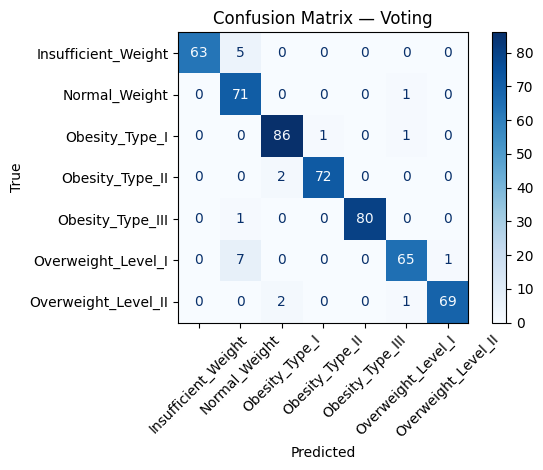


=== Stacking ===
Accuracy: 0.9602 | Weighted F1: 0.9604
                     precision    recall  f1-score   support

Insufficient_Weight       0.99      0.97      0.98        68
      Normal_Weight       0.88      0.94      0.91        72
     Obesity_Type_I       0.96      0.97      0.96        88
    Obesity_Type_II       1.00      0.97      0.99        74
   Obesity_Type_III       1.00      0.99      0.99        81
 Overweight_Level_I       0.94      0.90      0.92        73
Overweight_Level_II       0.96      0.97      0.97        72

           accuracy                           0.96       528
          macro avg       0.96      0.96      0.96       528
       weighted avg       0.96      0.96      0.96       528



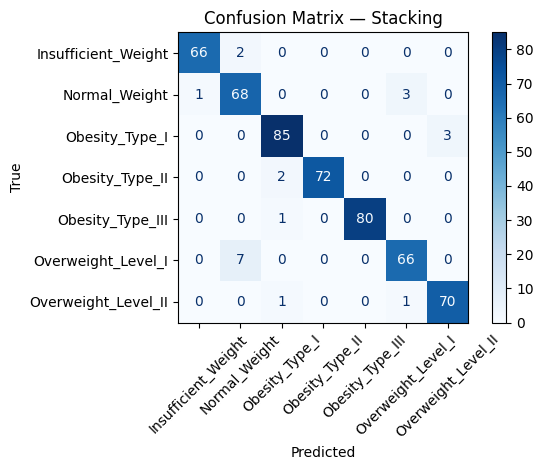

In [37]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

for name, model in [("Voting", voting), ("Stacking", stacking)]:
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"\n=== {name} ===")
    print(f"Accuracy: {acc:.4f} | Weighted F1: {f1:.4f}")
    print(classification_report(y_test, y_pred, target_names=le.classes_))

    # --- Confusion Matrix ---
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
    disp.plot(cmap='Blues', xticks_rotation=45, values_format='d')
    plt.title(f"Confusion Matrix — {name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.tight_layout()
    plt.show()

##   Final Conclusion

We built a **Multiclass Ensemble Model** to predict **7 obesity categories (NObeyesdad)**
ranging from *Insufficient Weight* to *Obesity Type III*.

- **Voting Classifier** → 95.83% Accuracy | 0.9588 Weighted F1  
- **Stacking Classifier** → **96.02% Accuracy | 0.9604 Weighted F1**

Both models performed exceptionally well, with **Stacking showing slightly stronger generalization**.  
All classes achieved F1-scores above 0.90, indicating excellent predictive balance and robustness.

🎯 **Key Highlight:**  
Balanced ensemble learning (Voting + Stacking) can effectively model complex health-related classification problems with multiple categories.

---

🏆 *If you found this notebook helpful, please leave an upvote — it motivates more open, high-quality work like this!*
